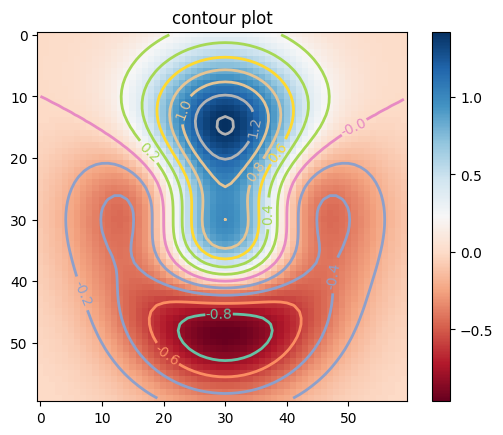

In [74]:
## Contour plot examples, code adapted from: https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html
# 2-D contour

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,title
import matplotlib.pyplot as plt


# generating synthetic data
# the function that we'll plot
def z_func(x,y):

     return (1-(x**2+y**3))*exp(-(x**2+y**2)/2)

x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

## generating a contour plot
im = imshow(Z,cmap=cm.RdBu) # drawing the function

# adding the contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right


# formatting the graph
title('contour plot')
plt.savefig('two_dimensional_plot.png',dpi = 1000)
plt.show()

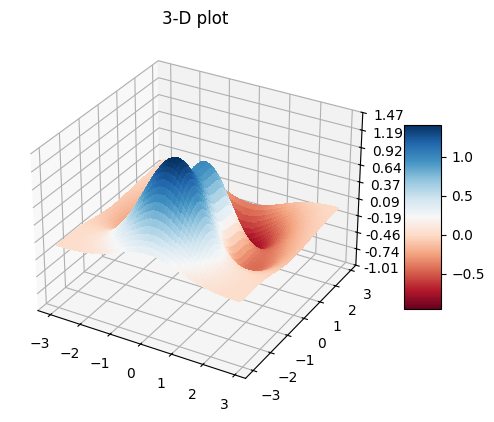

In [75]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# generating and formatting a graph in 3-D
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1,
                        cmap=cm.RdBu, linewidth=0, antialiased=False)

ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
ax1.set_title('3-D plot')
plt.savefig('three_dimensional_plot.png', dpi=1000)
plt.show()

In [76]:
## Contour Plots and Word Embedding Visualisation
# Data and pre-processing
import pandas as pd

In [77]:
data = pd.read_csv('IMDB_dataset.csv', encoding='utf8')
data = pd.DataFrame(data['review'])
data

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


In [78]:
import re
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

In [79]:
# cleaning functions definition
def preprocess(text):
    text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text))
    output = re.sub(r'\d+', '',text_input)
    return output.lower().strip()

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

In [80]:
# performing cleaning operations
data['review'] = data.review.map(preprocess)
data['review'] = data.review.map(remove_stopwords)

In [81]:
import re
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

def build_corpus(data):
    corpus = []
    for sentence in data.items():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(data['review'])

In [82]:
# Word2vec model training
from gensim.models import Word2Vec
model = Word2Vec(corpus, vector_size=200, min_count=10)

In [83]:
# Dimensionality reduction with PCA
from sklearn.decomposition import PCA

# fit a 3-D PCA model to the vectors
words = model.wv.key_to_index
vectors = model.wv.get_normed_vectors()
pca = PCA(n_components=3)
PCA_result = pca.fit_transform(vectors)

# prepare a dataframe
words_df = pd.DataFrame.from_dict(words, orient='index')
words_df.reset_index(inplace=True)
words_df = words_df.iloc[:,0]
words_df = pd.DataFrame(words_df)
words_df.rename({'index': 'word'}, axis=1, inplace=True)

PCA_result = pd.DataFrame(PCA_result)
PCA_result['x'] = PCA_result.iloc[0:, 0]
PCA_result['y'] = PCA_result.iloc[0:, 1]
PCA_result['z'] = PCA_result.iloc[0:, 2]

PCA_final = pd.merge(words_df, PCA_result, left_index = True, right_index=True)
PCA_final = PCA_final[['word','x','y','z']]

PCA_final = PCA_final.head(60)
PCA_final

,word,x,y,z
0,br,0.591319,0.237905,-0.429638
1,movie,0.778084,0.253312,-0.511444
2,film,0.736497,0.331891,-0.272179
3,one,0.566795,0.150839,-0.456440
4,like,0.476878,0.113284,-0.521481
5,good,0.552269,0.383673,-0.511484
6,time,0.544404,0.102817,-0.427686
7,even,0.576549,0.154941,-0.446407
8,would,0.573367,0.102089,-0.441635
9,story,0.593647,0.257202,-0.188708


In [84]:
## Contour plot visualization
# pivoting coordinates into a matrix structure
import numpy as np

Z = PCA_final.pivot_table(index='x', columns='y', values='z').T.values
Z = np.nan_to_num(Z, copy=True, nan=0.0)

X_unique = np.sort(PCA_final.x.unique())
Y_unique = np.sort(PCA_final.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

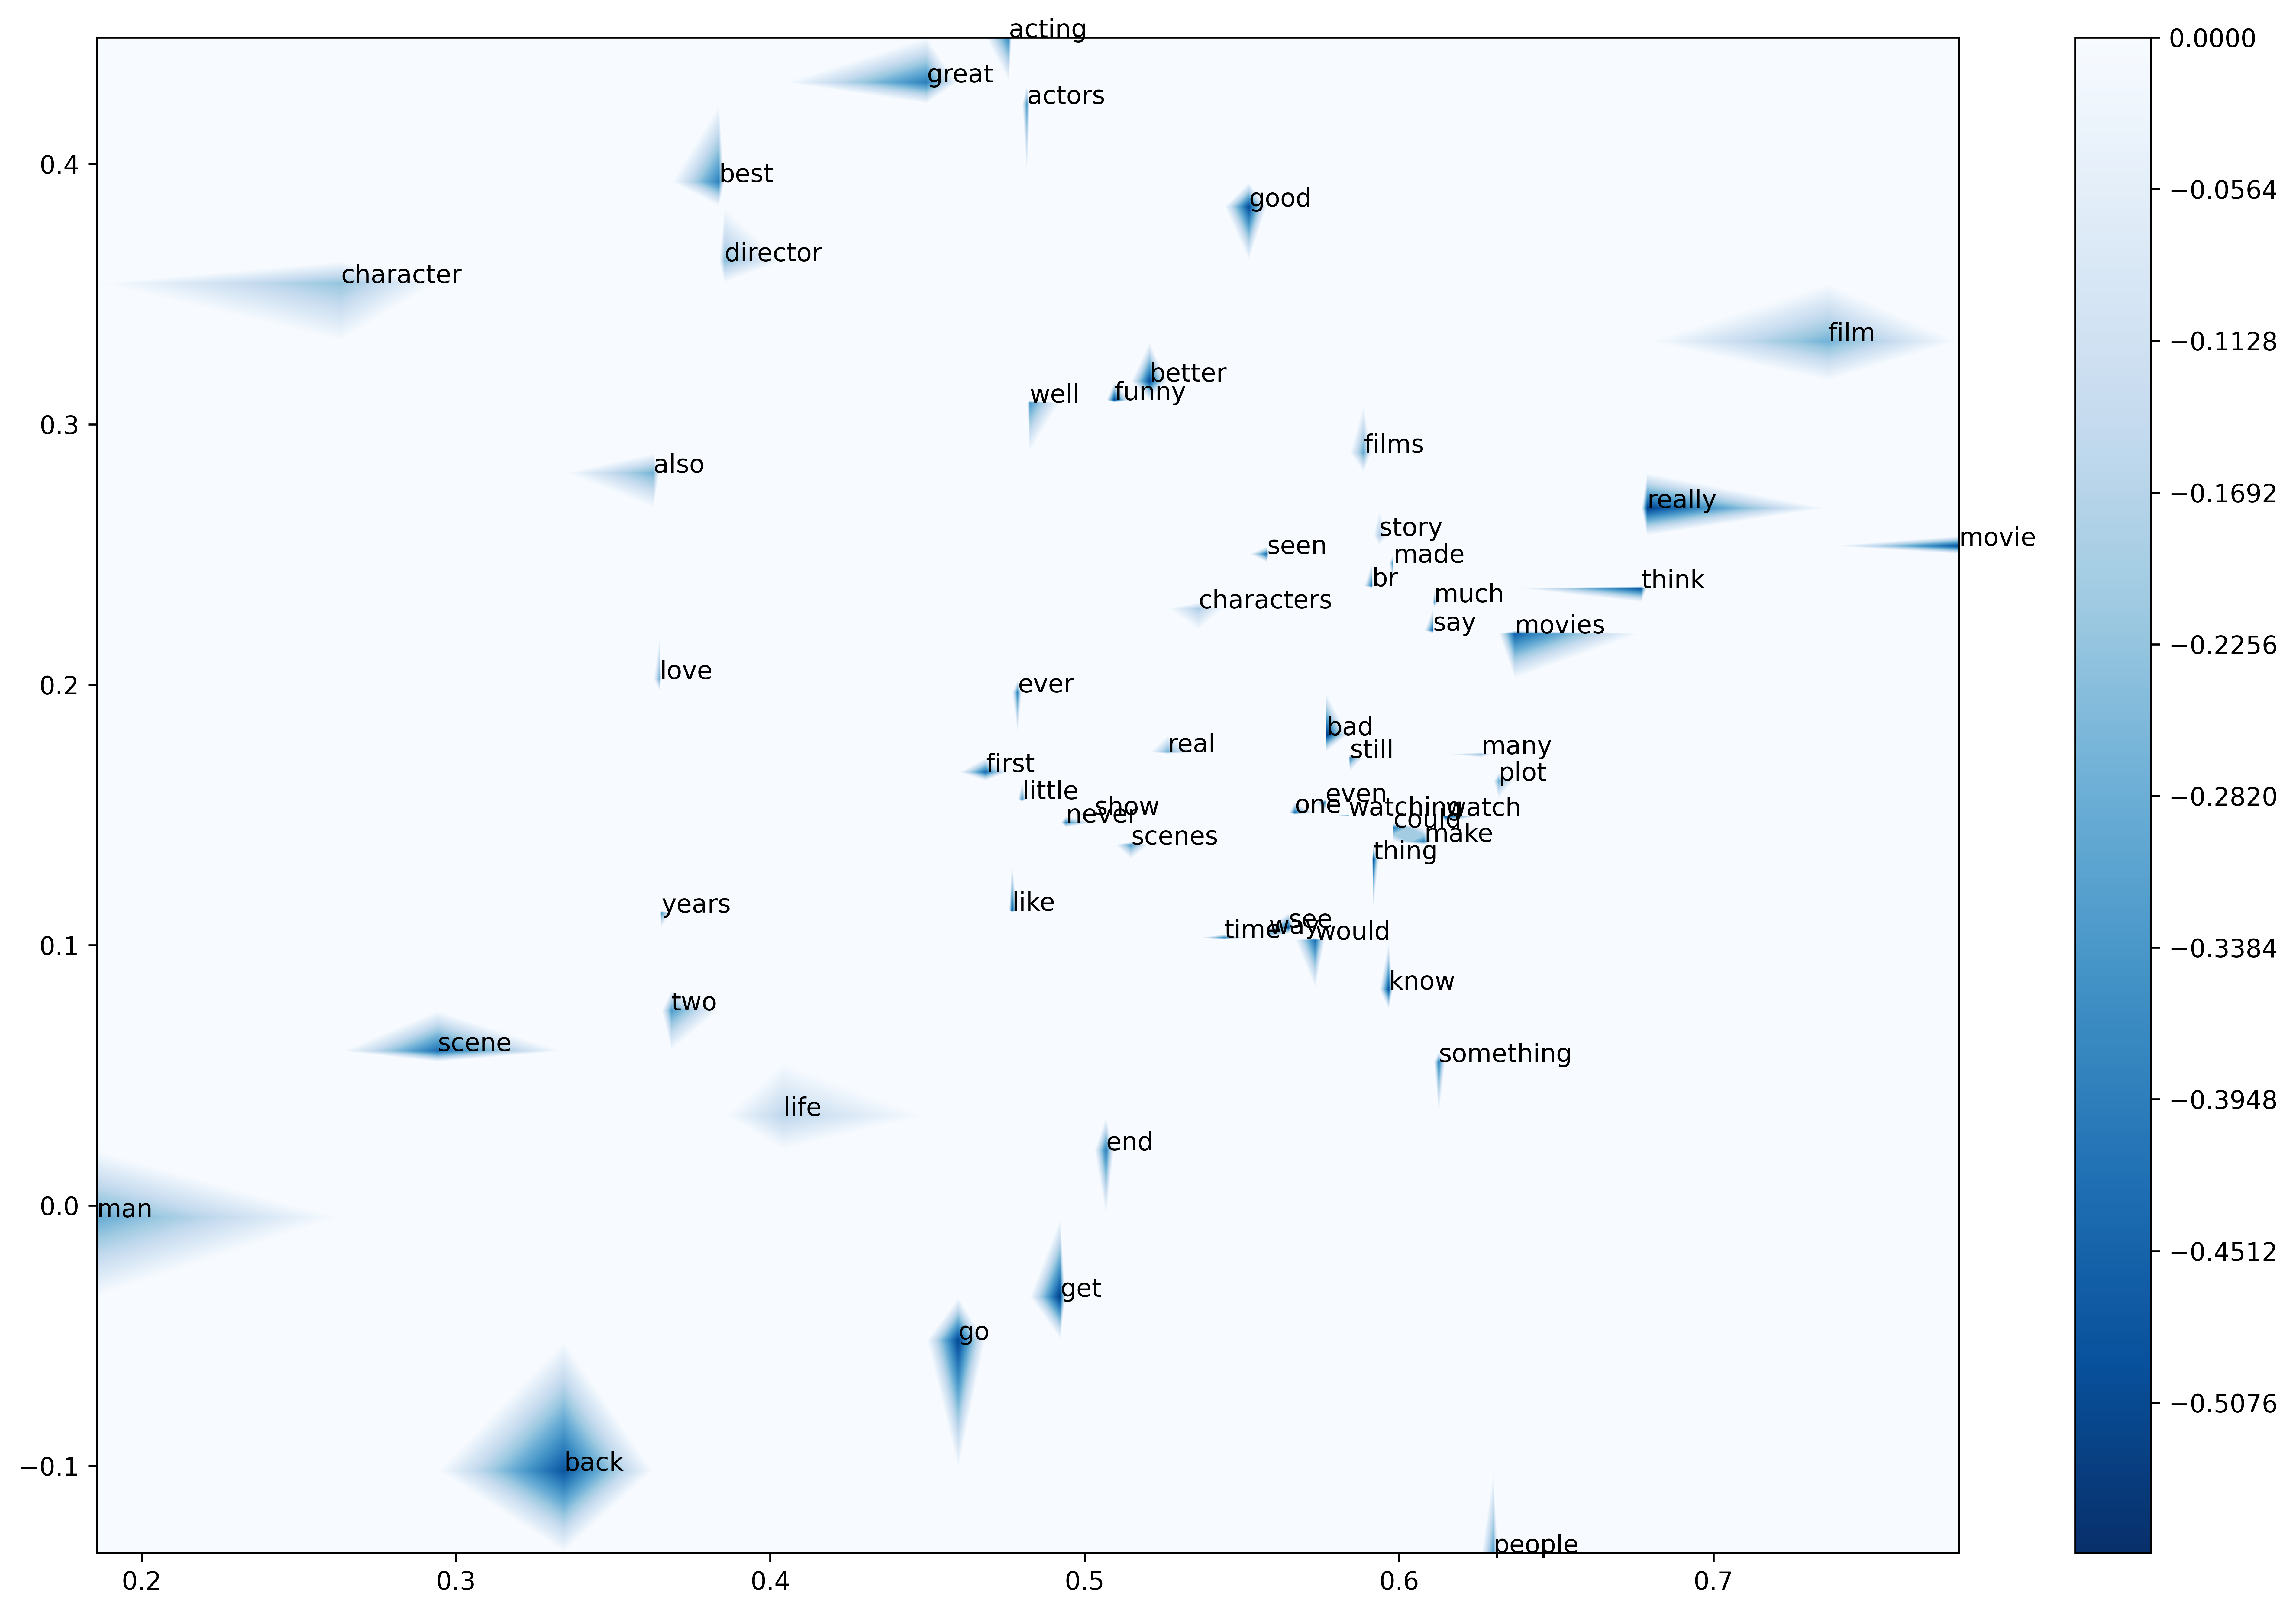

In [85]:
import matplotlib.pyplot as plt

# Set the DPI for HD resolution
dpi = 600

# Convert pixel dimensions to inches
width_in_pixels = 8400
height_in_pixels = 5400
figsize = (width_in_pixels / dpi, height_in_pixels / dpi)

plt.figure(figsize=figsize, dpi=dpi)
plt.contourf(X, Y, Z, 1000, cmap='Blues_r')  
# Loop through to annotate multiple datapoints
for i in range(PCA_final.shape[0]):
    plt.annotate(PCA_final.word.tolist()[i], (PCA_final.x.tolist()[i], PCA_final.y.tolist()[i]))

plt.tight_layout()

plt.colorbar()
plt.savefig('contour_2d.png', dpi=dpi)
plt.show()

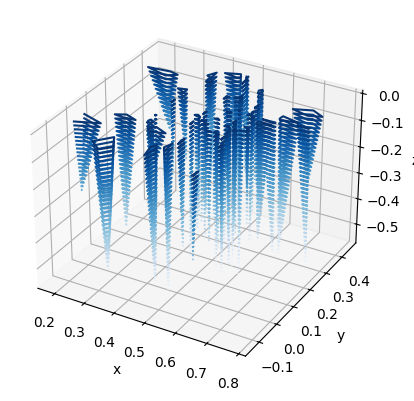

In [86]:
# generate a 3D contour plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='Blues')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig('contour_3d.png', dpi = 1000)
plt.show()